# introduction
this dataset includes car data and the goal is to predict car prices by k-nearest-neighbors method.

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 500)

In [2]:
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### notes
the data seems to have no header so the first row with data is set to header. the description of columns is here: https://archive.ics.uci.edu/ml/datasets/automobile

so we use them as header.

In [3]:
# setting the column names as header
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

### notes
for using the machine learning method k-nearest-neighbors it is important to use numerical columns.

interesting columns for predicting the car prices are:

    - wheel-base, length, width, height, curb-weight, horsepower, peak-rpm, city-mpg, highway-mpg
    
also intersting are the cols 

    - num-of-cylinders, num-of-doors
 
the last ones need to be transformed into integers as tehy are strings right now.

the target column would of course be the price col.

## normalizing the data

In [5]:
# replace the "?" (normalized-losses) with numpy.nan
cars = cars.replace("?", np.nan)

In [6]:
# picking cols with numeric data
numeric_data_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_data_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [8]:
# some cols are not numeric, so they have to be converted
# to make it simple converting into "float"-type seems to be legit
numeric_cars = numeric_cars.astype("float")
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [9]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### notes
the price col is our target col so as there are only four missing values, all rows with no price value will be removed.

to fix the other cols calculating the mean and replace the null-values with that schould be fine as these are also only a few values.

In [10]:
# removing rows with missing price values
numeric_cars = numeric_cars.dropna(subset=["price"])

# replace other missing values by mean()
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# confirm work
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
#normalizing the data in range of 0 to 1 but keeping the price col
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

normalized_cars["price"] = numeric_cars["price"]

normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# univariate k-nearest neighbors

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, dataframe):
    # randomize dataframe
    np.random.seed(1)        
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    # splitting dataframe into train and test
    half = int(rand_df.shape[0] / 2)
    train_df = rand_df[:half]
    test_df = rand_df[half:]
    # KNeighborsRegressor class
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    # calculate rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [13]:
test_cols = list(normalized_cars.columns)
test_cols.remove("price")
test_cols

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [14]:
best_performing_col = {}

for i in test_cols:
    col_rmse = knn_train_test(i, "price", normalized_cars)
    best_performing_col[i] = col_rmse
    
best_cols = pd.Series(best_performing_col)
best_cols.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### notes
by using only one column to predict the car prices, the best performing col is the horsepower col, because it has the lowest value which indicates best performance.

In [15]:
# adjust the function to accept k-value as parameter

def knn_train_test(train_col, target_col, dataframe, k_value):
    # randomize dataframe
    np.random.seed(1)        
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    # splitting dataframe into train and test
    half = int(rand_df.shape[0] / 2)
    train_df = rand_df[:half]
    test_df = rand_df[half:]
    # KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    # calculate rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [16]:
# performing the adjusted function with different k_values
best_cols_k = {}
k_values = [1,3,5,7,9]

for i in test_cols:
    best_cols_k[i] = []
    
    for k in k_values:
        col_rmse = knn_train_test(i, "price", normalized_cars, k)
        best_cols_k[i].append(col_rmse)
        
best_cols_k

{'normalized-losses': [7846.750605148984,
  7500.5698123109905,
  7330.197653434445,
  7756.421586234123,
  7688.096096891432],
 'wheel-base': [4493.734068810494,
  5120.161506064513,
  5461.553997873057,
  5448.1070513823315,
  5738.405685192312],
 'length': [4628.45550121557,
  5129.8358210721635,
  5427.2009608367125,
  5313.427720847974,
  5383.054514833446],
 'width': [4559.257297950061,
  4606.413692169901,
  4704.482589704386,
  4571.485046194653,
  4652.914172067787],
 'height': [8904.04645636071,
  8277.609643045525,
  8144.441042663747,
  7679.598124393773,
  7811.03606291223],
 'curb-weight': [5264.290230758878,
  5022.318011757233,
  4401.118254793124,
  4330.608104418053,
  4632.044474454401],
 'bore': [8602.58848450066,
  6984.239489480916,
  6780.627784685976,
  6878.097965921532,
  6866.808502038413],
 'stroke': [9116.495955406906,
  7338.68466990294,
  8006.529544647101,
  7803.937796804327,
  7735.554366079291],
 'compression-rate': [8087.205346523092,
  7375.06368557

## visualizing the different k_values

([<matplotlib.axis.XTick at 0x1a224ba8d0>,
 <a list of 5 Text xticklabel objects>)

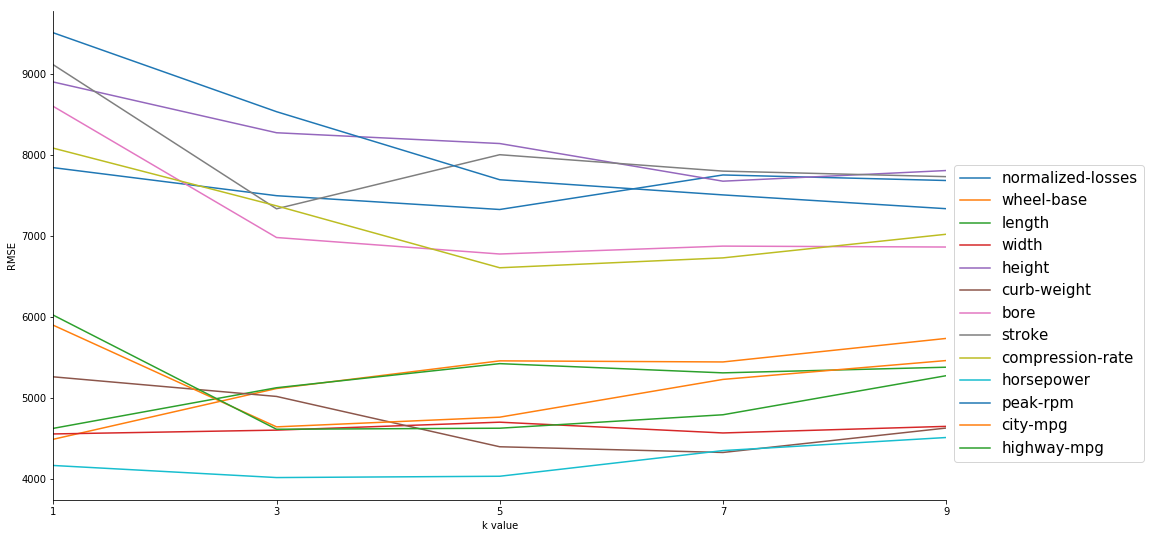

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

best_cols = pd.DataFrame(best_cols_k)
best_cols.plot(figsize=(16,9))
for pos in ['right','top']:
    plt.gca().spines[pos].set_visible(False)
plt.legend(fontsize=15, bbox_to_anchor=(1.0,0.7))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.xlim(0,4)
plt.xticks(np.arange(5), k_values)

## modifying the feunction for multiple columns

In [18]:
# adjusting the function to accept lists with columns
def knn_train_test(train_col, target_col, dataframe, k_value=5):
    # randomize dataframe
    np.random.seed(1)        
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    # splitting dataframe into train and test
    half = int(rand_df.shape[0] / 2)
    train_df = rand_df[:half]
    test_df = rand_df[half:]
    # KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_df[train_col], train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    # calculate rmse
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

multiple_cols = {
    "best_two_feat": ["horsepower", "curb-weight"],
    "best_three_feat": ["horsepower", "curb-weight", "highway-mpg"],
    "best_four_feat": ["horsepower", "curb-weight", "highway-mpg", "width"],
    "best_five_feat": ["horsepower", "curb-weight", "highway-mpg", "width", "city-mpg"]
}

multiple_cols_rmse = {}

for key, value in multiple_cols.items():
    rmse = knn_train_test(value,"price", normalized_cars)
    multiple_cols_rmse[key] = rmse

multiple_cols_rmse = pd.Series(multiple_cols_rmse)
multiple_cols_rmse

best_two_feat      3257.849049
best_three_feat    3365.911000
best_four_feat     3358.691580
best_five_feat     3341.602454
dtype: float64

### notes
with multiple columns for price prediction the output decreased clearly. so using multiple columns leads to a abtter prediction. but also it is remarkable that the comparison "more columns = better prediction" is not correct. the best output has only two features, the horsepower and the curb-weight.

### now using a bigger range of k_values

In [19]:
best_multiple_k = {}
k_values = [i for i in range(1, 26)]

for key, value in multiple_cols.items():
    best_multiple_k[key] = []
    
    for k in k_values:
        rmse = knn_train_test(value, "price", normalized_cars, k)
        best_multiple_k[key].append(rmse)
        
best_multiple_k

{'best_two_feat': [2790.1071433346656,
  2700.7472352504356,
  3003.7488055243016,
  3106.605625597663,
  3257.849049435976,
  3660.48709284375,
  3776.622550248818,
  3990.519746861657,
  4106.695501428088,
  4292.927729786319,
  4446.49068863902,
  4474.5040774983045,
  4535.433105685562,
  4557.787134869417,
  4626.44623473615,
  4616.715111529423,
  4627.590528180833,
  4591.404760116439,
  4602.10047883103,
  4609.448817726754,
  4643.491685319764,
  4652.902519818285,
  4697.632838416021,
  4738.027378987156,
  4760.49488106037],
 'best_three_feat': [2777.396403500627,
  2748.3975105936956,
  2974.222577144125,
  3044.7311186338325,
  3365.9110004529675,
  3753.3453221807013,
  4002.283314211729,
  4122.1233863450125,
  4229.9489661319985,
  4336.475078509578,
  4495.725032539499,
  4624.353323929217,
  4621.50491988593,
  4607.848304334326,
  4612.372692791176,
  4674.906061927671,
  4725.820710082348,
  4767.619185969055,
  4746.534762163849,
  4759.888780956884,
  4765.8570642

(1, 25)

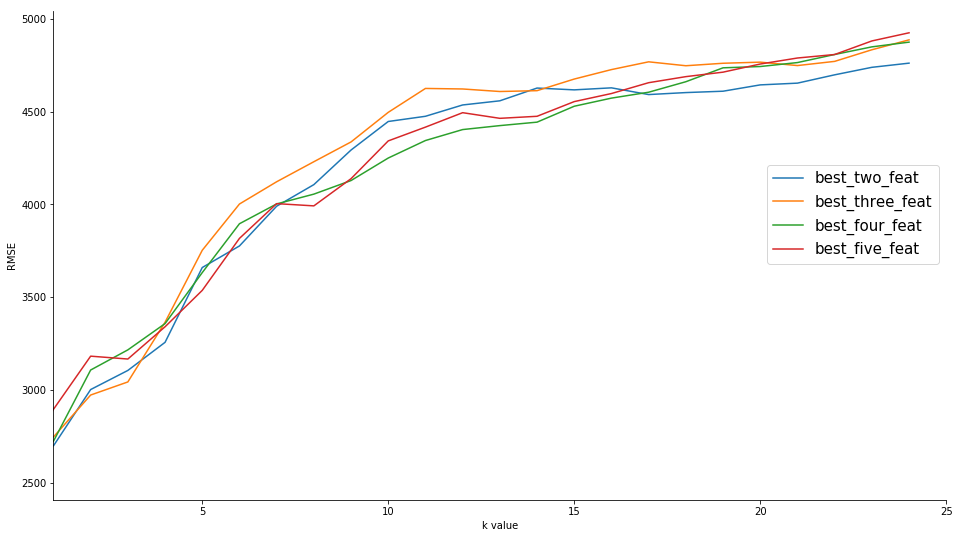

In [20]:
best_multiple_k = pd.DataFrame(best_multiple_k)
best_multiple_k.plot(figsize=(16,9))
for pos in ['right','top']:
    plt.gca().spines[pos].set_visible(False)
plt.legend(fontsize=15, bbox_to_anchor=(1.0,0.7))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.xlim(1,25)